## Gráficos Estatísticos com Seaborn

Gráficos estão distribuído em 2 blocos:
- para as variáveis Contínuas
- para as variáveis Categóricas

Pacote utilizado durante o processo de análise

https://seaborn.pydata.org/

In [ ]:
!pip install seaborn

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
sns.__version__

'0.11.0'

In [6]:
np.__version__

'1.19.4'

In [3]:
# Datasets importados junto com o Seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [4]:
# Carregando um dataset
iris = sns.load_dataset("iris")

In [13]:
type(iris) 

pandas.core.frame.DataFrame

In [14]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Construindo Gráficos Estatísticos

## Gráficos para Variáveis Contínuas

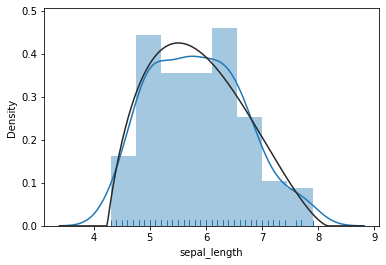

In [17]:
# Histograma com estimativa de densidade de kernel - Distribuição univariada (uma var)

sns.distplot(iris.sepal_length, rug = True, fit = stats.gausshyper);

# fit = stats.gausshyper -> a linha que acompanha o histograma é feito a partir do pacote stats
# rug = True -> tracinhos no eixo x

In [18]:
?sns.distplot

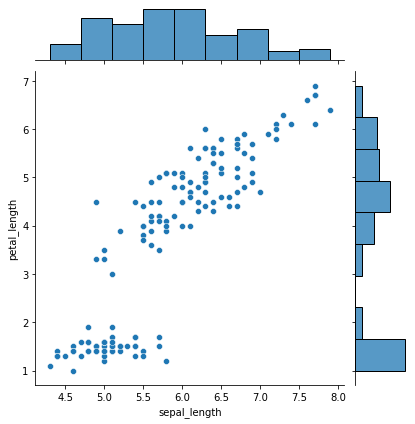

In [20]:
# Scatterplot - Distribuição bivariada (duas var's)

sns.jointplot(x = "sepal_length", y = "petal_length", data = iris)

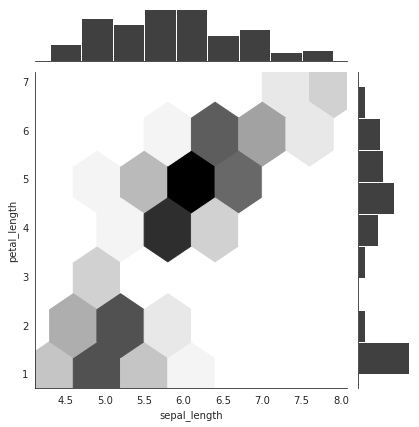

In [21]:
# Gráfico útil quando estiver trabalhando com grandes conjuntos de dados - Distribuição bivariada

# OBS: Quando os pontinhos ficarem muito agrupados, criamos agrupamentos tipo colméias

with sns.axes_style("white"):
    sns.jointplot(x = "sepal_length", y = "petal_length", data = iris, kind = "hex", color  ="k");

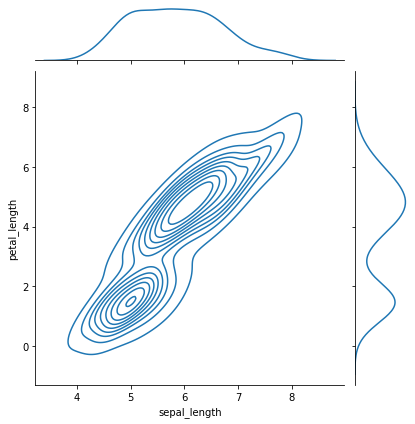

In [23]:
# Distribuição bivariada

sns.jointplot(x = "sepal_length", y = "petal_length", data = iris, kind = "kde");

# Tipo de densidade: kind = "kde
# kind default são os pontinho

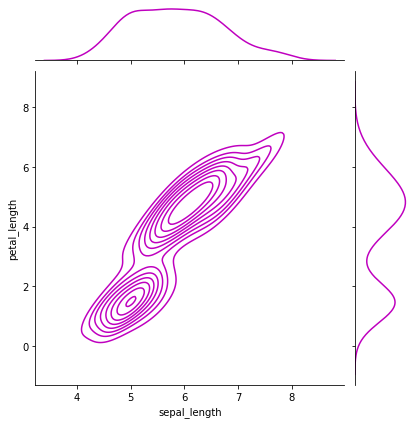

In [24]:
# Distribuição bivariada

# Ajustes
g = sns.jointplot(x = "sepal_length", y = "petal_length", data = iris, kind = "kde", color = "m")
g.plot_joint(plt.scatter, c = "w", s = 30, linewidth = 1, marker = "+")
g.ax_joint.collections[0].set_alpha(0);

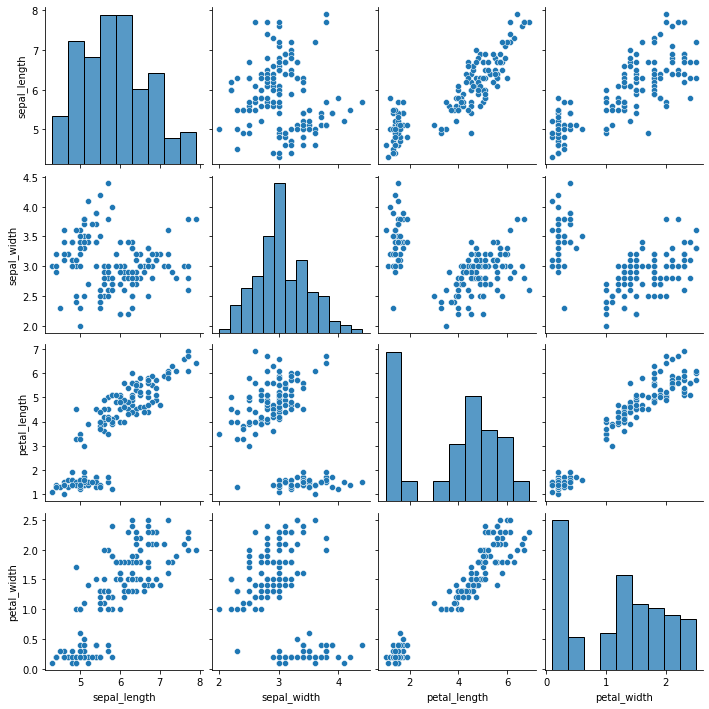

In [25]:
# Plot para distribuições bi-variadas (perceba que no gráfico de uma variável com ela mesma, a distribuição é univariada)

# O pair plot mostra a relação de um var com ela mesma e com todas as outras
sns.pairplot(iris);

## Visualização de Relacionamento Linear

In [26]:
# Carregando o dataset tips
tips = sns.load_dataset("tips")

In [27]:
type(tips)

pandas.core.frame.DataFrame

In [28]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


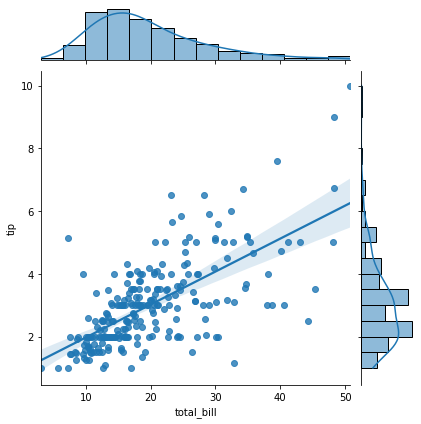

In [30]:
# Scatterplot com linha de regressão - Distribuição bivariada

sns.jointplot(x = "total_bill", y = "tip", data = tips, kind = "reg");

# kind = "reg" -> relacionamento linear
# A parte sombreada é o intervalo de confiança

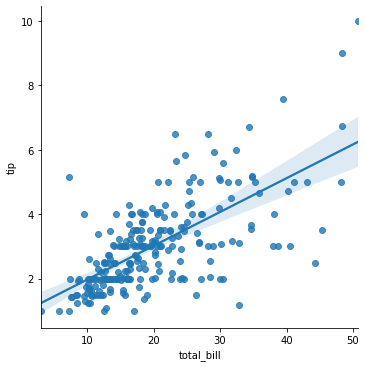

In [31]:
# Regressão Linear (utiliza 95% de intervalo de confiança por padrão)
# tip - variável dependente
# total_bill - variável independente


sns.lmplot(x = "total_bill", y = "tip", data = tips);

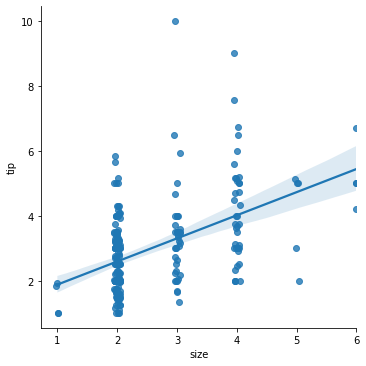

In [32]:
# Alterando a variável independente

sns.lmplot(x = "size", y = "tip", data = tips, x_jitter = .05);

# Note pelos pontos que não temos relacionamento linear

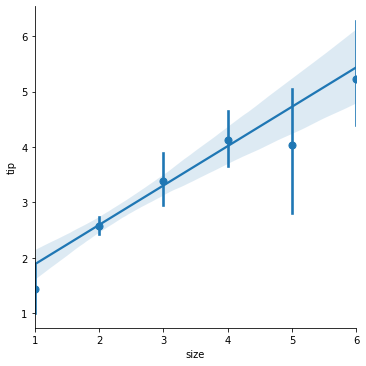

In [33]:
# Visualizando o efeito de diferentes tamanho de tips
sns.lmplot(x = "size", y = "tip", data = tips, x_estimator = np.mean);

# Assim, podemos colocar o intervalo de confiança em torno do valor da média, distribuindo a info de forma mais interessante. 

In [34]:
# Carregando o dataset anscombe

anscombe = sns.load_dataset("anscombe")

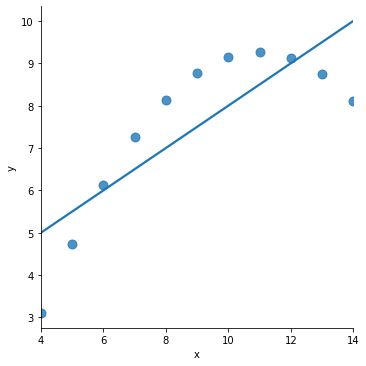

In [35]:
# Relacionamento não-linear

sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'II'"), ci = None, scatter_kws = {"s": 80});

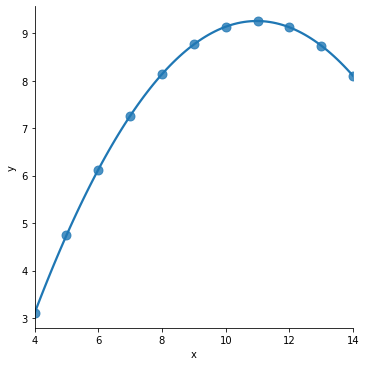

In [36]:
# Podemos ajustar os parâmetros para se adequarem a curva

sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'II'"), order = 2, ci = None, scatter_kws = {"s": 80});

# Parametro para fazer isso:  order = 2

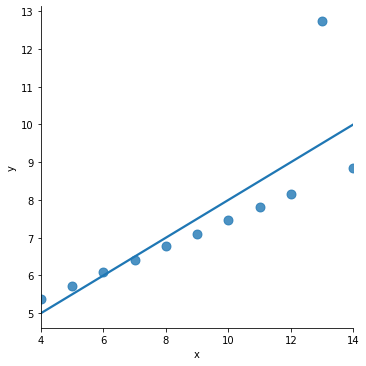

In [37]:
# Visualizando outliers

sns.lmplot(x = "x", y = "y", data = anscombe.query("dataset == 'III'"), ci = None, scatter_kws = {"s": 80});

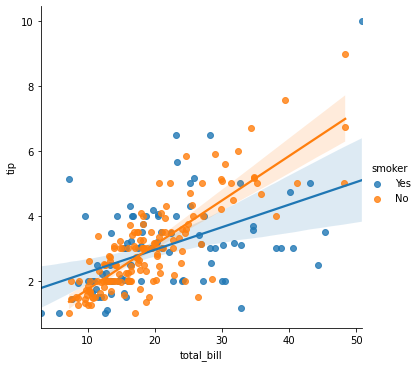

In [38]:
# Usando mais de 2 variáveis

sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = tips);

#  hue = "smoker" relacionamento entre mais variaveis

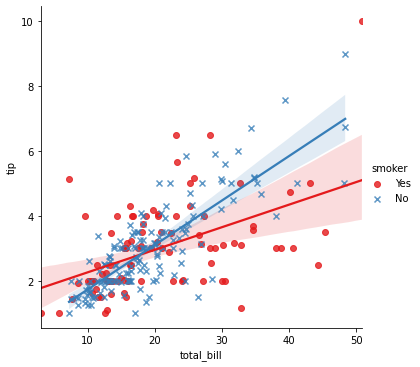

In [39]:
# Alterando a configuração do gráfico

sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", data = tips, markers = ["o", "x"], palette = "Set1");

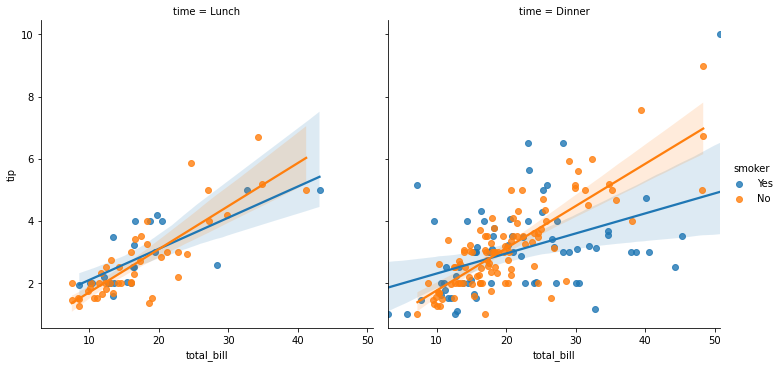

In [40]:
# Dividindo a área de desenho

sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = tips);

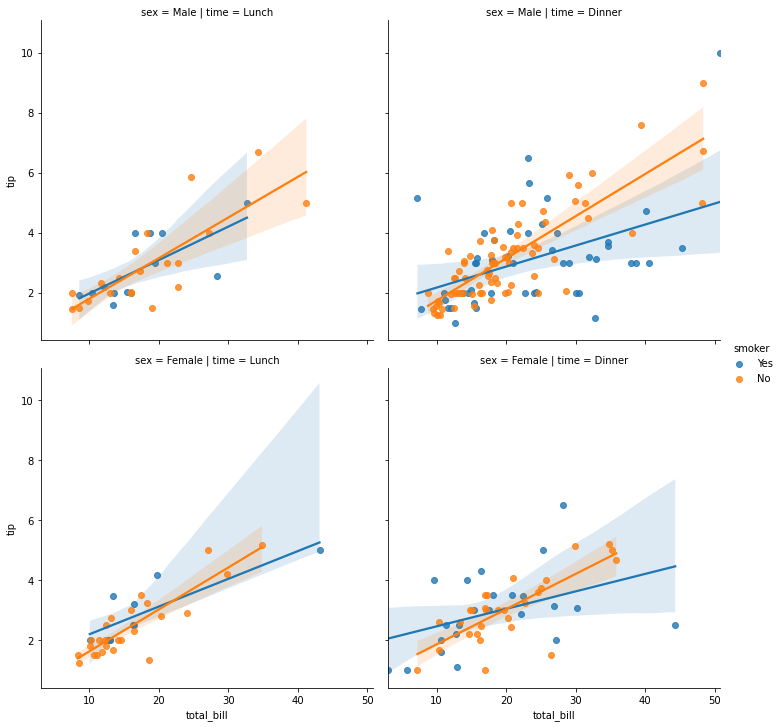

In [41]:
# Dividindo a área de desenho

sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", row = "sex", data = tips);

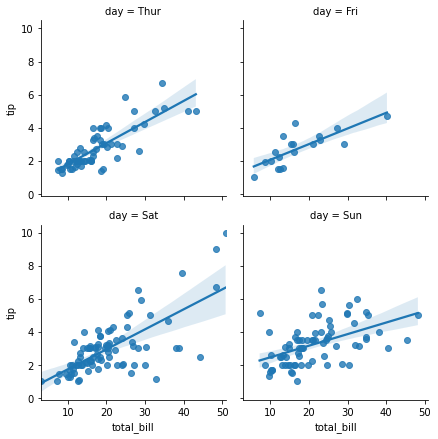

In [42]:
# Dividindo a área de desenho

sns.lmplot(x = "total_bill", y = "tip", col = "day", data = tips, col_wrap = 2, size = 3);

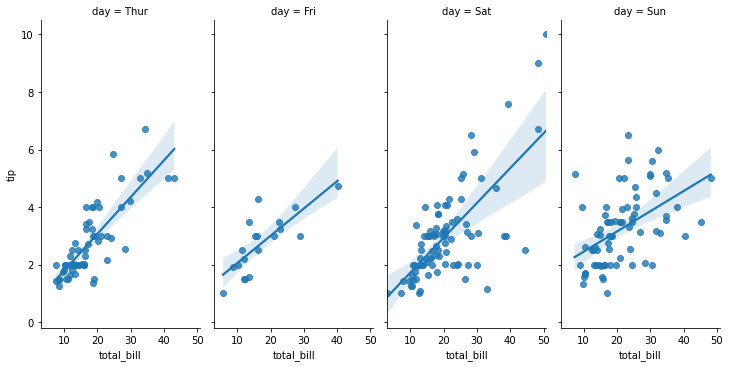

In [43]:
# Dividindo a área de desenho
sns.lmplot(x = "total_bill", y = "tip", col = "day", data = tips, aspect = .5);

## Gráficos para Variáveis Categóricas

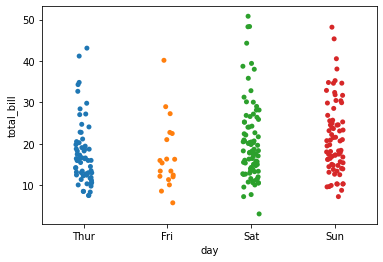

In [44]:
# stripplot
sns.stripplot(x = "day", y = "total_bill", data = tips);

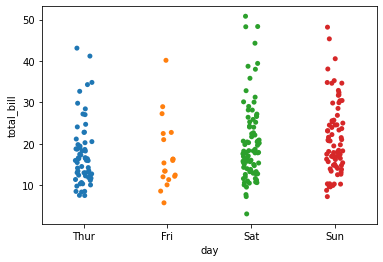

In [45]:
# stripplot
sns.stripplot(x = "day", y = "total_bill", data = tips, jitter = True);

# jitter = True : espalha dos dados para facilitar a visualizaçao

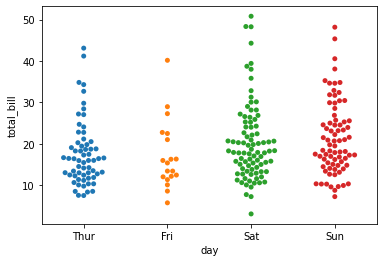

In [46]:
# swarmplot - Evitando overlap dos pontos (desenho um pouco mais aberto)
sns.swarmplot(x = "day", y = "total_bill", data = tips);

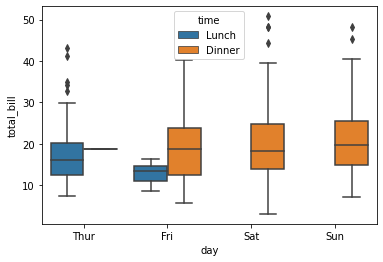

In [47]:
# boxplot

sns.boxplot(x = "day", y = "total_bill", hue = "time", data = tips);

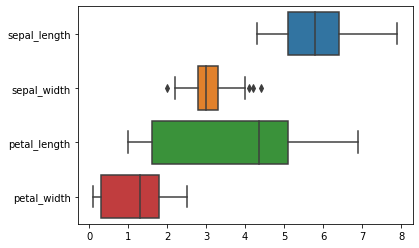

In [48]:
# boxplot - horizontal 
sns.boxplot(data = iris, orient = "h");

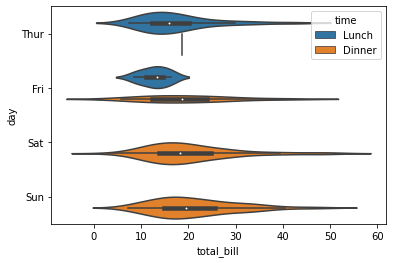

In [49]:
# violinplot
sns.violinplot(x = "total_bill", y = "day", hue = "time", data = tips);

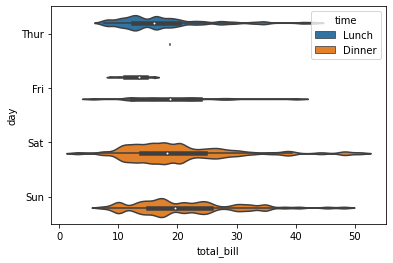

In [50]:
# violinplot
sns.violinplot(x = "total_bill", y = "day", hue = "time", data = tips, bw = .1, scale = "count", scale_hue = False);

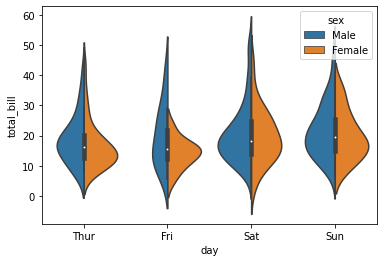

In [51]:
 # violinplot
sns.violinplot(x = "day", y = "total_bill", hue = "sex", data = tips, split = True);

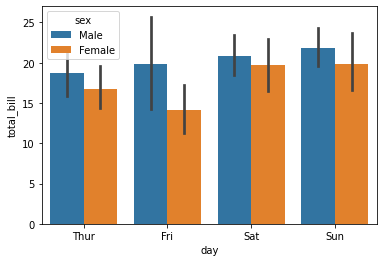

In [52]:
# barplot
sns.barplot(x = "day", y = "total_bill", hue = "sex", data = tips);

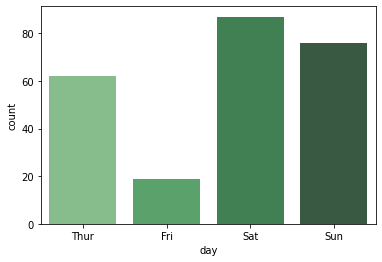

In [53]:
# countplot - contagem dos elementos 
sns.countplot(x = "day", data = tips, palette = "Greens_d");

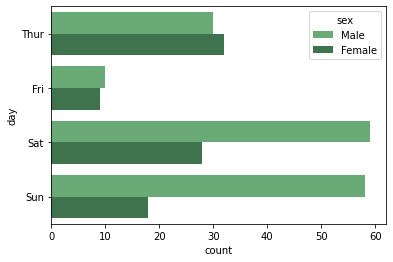

In [54]:
# countplot
sns.countplot(y = "day", hue = "sex", data = tips, palette = "Greens_d");

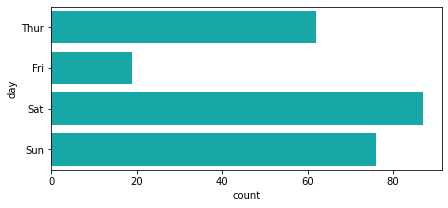

In [55]:
# countplot
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y = "day", data = tips, color = "c");

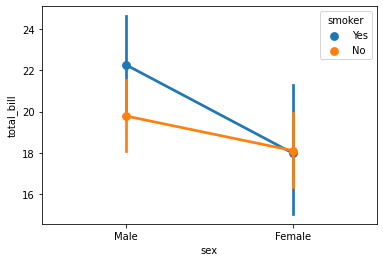

In [56]:
# pointplot
sns.pointplot(x = "sex", y = "total_bill", hue = "smoker", data = tips);

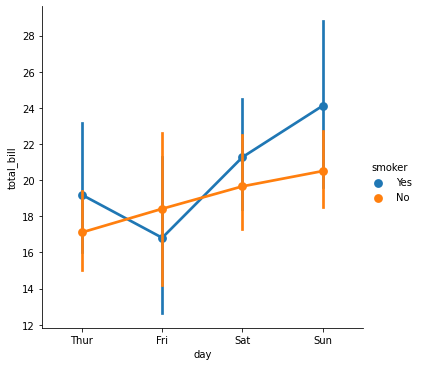

In [57]:
# factorplot
sns.factorplot(x = "day", y = "total_bill", hue = "smoker", data = tips);

## Visualizando DataFrames Pandas com Seaborn

In [58]:
import random
import pandas as pd

In [59]:
df = pd.DataFrame()

In [60]:
# Criar um range de valores
df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)

In [61]:
df.head()

,x,y
0,48,63
1,50,89
2,15,32
3,93,79
4,43,54


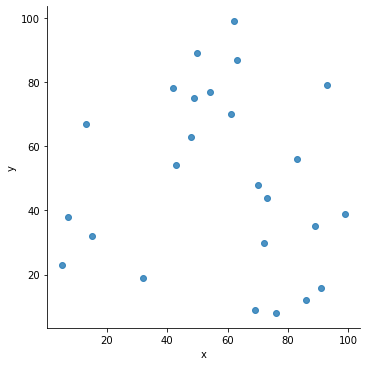

In [62]:
# Scatterplot
sns.lmplot('x', 'y', data = df, fit_reg = False)

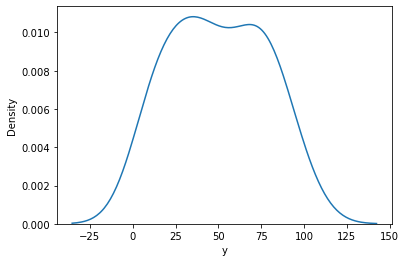

In [63]:
# Density Plot
sns.kdeplot(df.y)

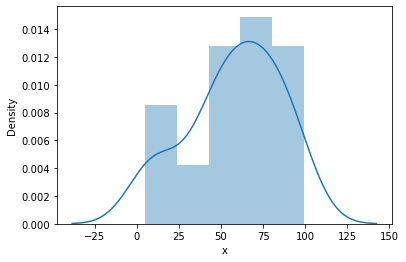

In [67]:
# Distplot
sns.distplot(df.x)

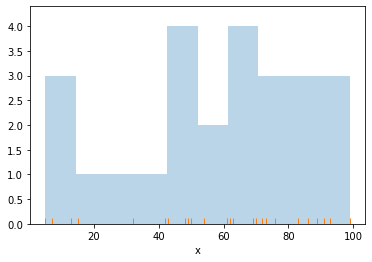

In [68]:
# Histograma
plt.hist(df.x, alpha = .3)
sns.rugplot(df.x);

In [ ]:
?sns.rugplot

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       25 non-null     int64
 1   y       25 non-null     int64
dtypes: int64(2)
memory usage: 528.0 bytes


In [75]:
list(df)

['x', 'y']

In [ ]:
# Boxplot
sns.boxplot([df.y, df.x])

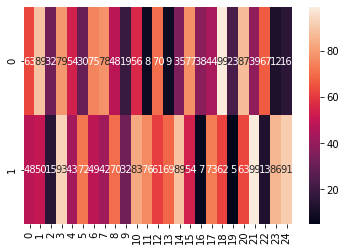

In [73]:
# Heatmap
sns.heatmap([df.y, df.x], annot = True, fmt = "d")

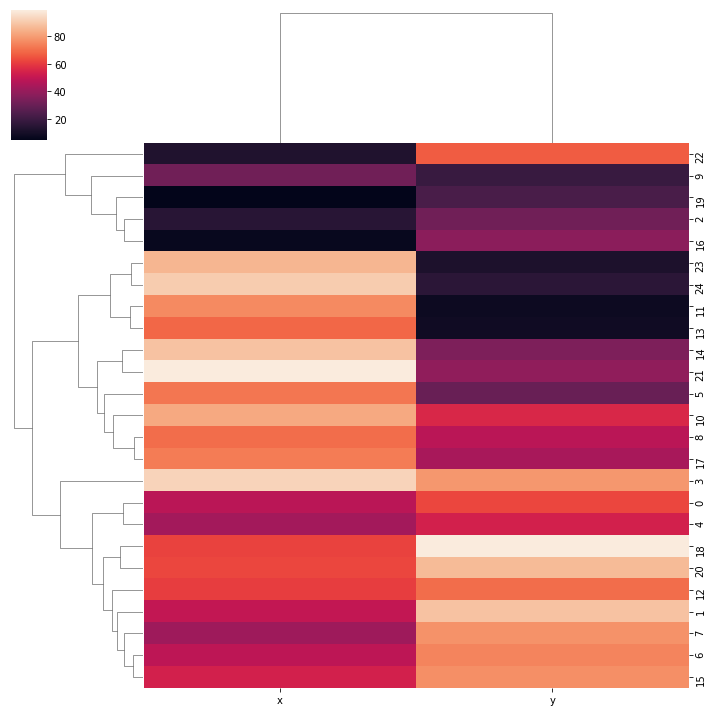

In [74]:
# Clustermap
sns.clustermap(df)

# Fim